# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**План работы**
- Загрузка и изучение данных;
- Предобработка данных;
- Расчеты;
- Исследовательский анализ;
- Выводы.

## Изучение данных из файла

In [20]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
import warnings
warnings.simplefilter("ignore")

In [21]:
# загрузим данные и изучим информацию

data = pd.read_csv('real_estate_data.csv', sep='\t')
data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Вывод

В таблице 22 столбца, с информацией по продажам квартир. Таблица содержит 4 типа данных. Изучив информацию и первые пять строк можно сделать выводы: 

1. Есть столбец с некорректным наименованием - cityCenters_nearest. Необходимо заменить это название на правильное.
2. Некоторые типы данных с плавающей точкой (float). Заменим их на целочисленный тип (int). такие как last_price, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition.
3. Данные с датой first_day_exposition имеет полный формат с отображением времени, а нам нужна только дата.
4. Пропуски is_apartment, studio, balcony
5. Другие пропуски, которые либо удалим либо заменим на средние или медианные значения.
6. Также я бы поработала с датой публикации, время там не проставлено, значит мы можем оставить просто дату.


## Предобработка данных

In [22]:
# меняем единственное некорректное наименование столбца 

data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

Заменили название столбца cityCenters_nearest, приводим вид к змеинному стилю и нижнему регистру

In [23]:
# проверяем количество пропусков по каждому столбцу

display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Методом isna() проверили количество пропусков. Больше чем в половине столбцов присутствуют пропущенные значения.

In [24]:
# замена пропусков в столбце is_apartment

data['is_apartment'] = np.where(data.studio == False, True, False)
display(data['is_apartment'].isna().sum())

0

Столбец is_apartment почти весь в пропусках, зато в столбце studio ни одного прпуска нет. Заменим пропуски на True, если в studio в этой строке False, и наоборот.

In [25]:
# замена пропусков в столбце balcony

data['balcony'] = data['balcony'].fillna(0)
display(data['balcony'].isna().sum())

0

Пропуски по столбцу balcony смело можно заменить на 0, скорей всего в этих квартирах просто нет балконов.

In [26]:
# удаление пропусков в столбце locality_name

data = data.dropna(subset=['locality_name']).reset_index(drop=True)

# проверим какие лишние слова есть в locality_name

lem_data = list(data['locality_name'])
lem_data = ' '.join(lem_data)
lemmas = m.lemmatize(lem_data)

print(Counter(lemmas))
display(data['locality_name'].value_counts())

# избавляемся от лишних слов в locality_name, приводим все наименования к одному регистру

remove_words = ['поселок', 'деревня', 'городского', 'городской', 'типа', 'село', 'посёлок', '  ']
pat = '|'.join(remove_words)
data['locality_name'] = data['locality_name'].str.lower().replace(pat, '', regex=True)
data['locality_name'] = data['locality_name'].str.lstrip()

lem_data = list(data['locality_name'])
lem_data = ' '.join(lem_data)
lemmas = m.lemmatize(lem_data)

display(data['locality_name'].value_counts())

Counter({' ': 28870, 'санкт-петербург': 15721, 'поселок': 2660, 'деревня': 945, 'муриный': 590, 'городской': 550, 'кудрово': 443, 'шушар': 440, 'всеволожск': 398, 'пушкин': 369, 'тип': 363, 'колпино': 338, 'парголовый': 327, 'гатчина': 307, 'выборг': 237, 'село': 210, 'петергоф': 201, 'красный': 190, 'новый': 187, 'сестрорецк': 183, 'девяткино': 144, 'сертолово': 142, 'ломоносов': 133, 'бугор': 114, 'сланцы': 112, 'волхов': 111, 'кириши': 110, 'сосновый': 105, 'кингисепп': 104, 'тосно': 104, 'бор': 101, 'кронштадт': 96, 'никольское': 94, '-': 91, 'коммунар': 90, 'кировск': 84, 'отрадный': 79, 'старый': 75, 'янино': 68, '1': 68, 'металлострой': 66, 'приозерск': 66, 'луг': 61, 'шлиссельбург': 57, 'имя': 53, 'тихвин': 49, 'стрельна': 44, 'тельман': 41, 'большой': 40, 'павловск': 38, 'рощино': 38, 'романовка': 37, 'волосово': 36, 'свердлов': 36, 'кузьмоловский': 35, 'мга': 33, 'сиверский': 29, 'кудровый': 29, 'ивангород': 28, 'новоселье': 28, 'малый': 28, 'сясьстрой': 24, 'зеленогорск': 24

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

санкт-петербург            15721
мурино                       590
кудрово                      472
шушары                       440
всеволожск                   398
                           ...  
пельгора                       1
каложицы                       1
платформа 69-й километр        1
почап                          1
дзержинского                   1
Name: locality_name, Length: 311, dtype: int64

Пропусков в locality_name всего 49 (меньше 1%), такое количество не повлияет на анализ. Их можно убрать методом dropna(). 
Для того, чобы дальше работать с данными для заполнения пропущенных расстояний, избавимся от неявных дубликатов в locality_name. С помощью лемматизации находим частые повторяющиеся слова такие как село, поселок, деревня и т.п. Далее используя метод replace() удаляем все эти слова и ненужные пробелы.

Пропуски по столбцу ceiling_height оставляем без изменений. 

In [27]:
# kitchen_area

display(data['kitchen_area'].describe())

data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].min())

display(data['kitchen_area'].isna().sum())

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

0

In [28]:
# living_area

data.loc[data['living_area'].isna(), 'living_area'] = (data['total_area'] - data['kitchen_area'])
display(data['living_area'].isna().sum())

0

В kitchen_area больше пропусков чем living_area, для этого возьмем медианные значения по группам в total_area и заменим ими площадь кухни + оставшиеся 205 значений заполним минимальными. Далее для жилой площади можно отнять от общей площади кухню и заполнить полученным результатом пропуски в living_area. Количество пропусков в этих столбцах уменьшилось на порядок.

In [29]:
# floors_total

data['floors_total'] = data['floors_total'].fillna(data.groupby('locality_name')['floors_total'].transform('max'))

display(data['floors_total'].isna().sum())

0

Пропуски floors_total можно заполнить максимальными значениями по местоположению

In [30]:
# airports_nearest, city_centers_nearest, parks_around3000, ponds_around3000

data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data.groupby('locality_name')['city_centers_nearest'].transform('median'))
data['parks_around3000'] = data['parks_around3000'].fillna(data.groupby('locality_name')['parks_around3000'].transform('median'))
data['ponds_around3000'] = data['ponds_around3000'].fillna(data.groupby('locality_name')['ponds_around3000'].transform('median'))
data['parks_around3000'] = data['parks_around3000'].fillna(0.0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0.0)

display(data['airports_nearest'].isna().sum())
display(data['city_centers_nearest'].isna().sum())
display(data['parks_around3000'].isna().sum())
display(data['ponds_around3000'].isna().sum())

4829

4829

0

0

Пропуски в airports_nearest, city_centers_nearest заполняем медианой по locality_name. Но заполнилось не так много строк, скорей всего, потому что данные в этих столбцах пропущены чаще всего и именно в тех городах/поселках, которые встречаются редко в нашей таблице. В реальной работе такую проблему можно решить, попробовав обратиться к заказчику за уточнением или подгрузив данные с карт. 
Для двух столбцов мы можем предположить, что оставшиеся пропуски это отсутсвие в целом парков и прудов в районе 3000 м. Заменим parks_around3000 и ponds_around3000 на медианные по местоположению а рсавшиеся на 0. 

In [31]:
#parks_nearest, ponds_nearest

display(data['ponds_nearest'].isna().sum())
display(data['parks_nearest'].isna().sum())

data.loc[data['ponds_around3000'] >= 1.0, 'ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'))
data.loc[data['parks_around3000'] >= 1.0, 'parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median')) 
    
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('max'))
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('max')) 


display(data['ponds_nearest'].isna().sum())
display(data['parks_nearest'].isna().sum())

14565

15586

4938

5998

Оставшиеся значения в parks_nearest, ponds_nearest заполним так же медианой, но добавим условие на наличие парка или пруда поблизости. Также мало изменений, но удалять такое количество пропусов, значит лишиться больше половины данных. Попробуем заполнить оставшиеся пропуски максимальными значениями с этого столбца.

Касательно дней публикации объявлений, можно выдвинуть пару предположений: либо эти обявления были созданы, но не ушли в публикацию (по причине отсутсвующих данных или неоплаты), либо на момент формирования таблицы они все еще были активны, или же пользователи по каким-то причинам сами не сняли с публикации свое объявление. Пропуски в days_exposition оставим также без изменений.

In [32]:
display(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9160
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        4829
city_centers_nearest    4829
parks_around3000           0
parks_nearest           5998
ponds_around3000           0
ponds_nearest           4938
days_exposition         3180
dtype: int64

Методом isna() опять проверяем количество пропусков. Стало немного лучше. 

In [33]:
# замена типа данных в столбцах last_price, total_area, ceiling_height, floors_total, 
# living_area, kitchen_area, balcony, airports_nearest, city_centers_nearest, parks_around3000, 
# parks_nearest, ponds_around3000, ponds_nearest, days_exposition

data['last_price'] = data['last_price'].astype(int, errors='ignore')
data['floors_total'] = data['floors_total'].astype(int, errors='ignore')
data['balcony'] = data['balcony'].astype(int, errors='ignore')
data['ponds_around3000'] = data['ponds_around3000'].astype(int, errors='ignore')
data['parks_around3000'] = data['parks_around3000'].astype(int, errors='ignore')

display(data.info())
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  int64  
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23650 non-null  int64  
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,...,25.00,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,NaN,11,18.60,1,True,...,11.00,2,шушары,12817.0,18603.0,0,NaN,0,1050.0,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5,34.30,4,True,...,8.30,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.00,2015-07-24T00:00:00,3,NaN,14,144.00,9,True,...,15.00,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,...,41.00,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23645,9,9700000,133.81,2017-03-21T00:00:00,3,3.70,5,73.30,3,True,...,13.83,0,санкт-петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23646,14,3100000,59.00,2018-01-15T00:00:00,3,NaN,5,38.00,4,True,...,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN,45.0
23647,18,2500000,56.70,2018-02-11T00:00:00,2,NaN,3,29.70,1,True,...,8.40,0,рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23648,13,11475000,76.75,2017-03-28T00:00:00,2,3.00,17,53.45,12,True,...,23.30,2,санкт-петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


Методом astype() меняем тип данных в некоторых столбцах. С большинством этих столбцов мы будем проводить математические операции, в следсвие чего в данных могут образоваться дроби с большим количеством знаков после запятой.

In [34]:
# first_day_exposition

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
display(data.sort_values(by='first_day_exposition').groupby('first_day_exposition')['first_day_exposition'].count())

first_day_exposition
2014-11-27    19
2014-11-29     1
2014-12-04     2
2014-12-05     1
2014-12-08     8
              ..
2019-04-29    37
2019-04-30    27
2019-05-01    30
2019-05-02    11
2019-05-03    20
Name: first_day_exposition, Length: 1491, dtype: int64

Методом to_datetime() изменим формат даты, время у нас никак не учитывается, поэтому можно оставить только дату.

**Вывод**

Мы обработали данные почти во всех столбцах таблицы. Заменили пропуски на медианные, средние и нулевые значения. Изменили типы данных в некоторых столбцах с количественными данными. После обработки таблицы пропусков по отношению ко всему датасету осталось не очень много. Удалять пока не будем, так как рискуем потерять большую часть данных.

## Расчёты и добавление результатов в таблицу

In [35]:
# цена квадратного метра

data['square_meter_price'] = (data['last_price'] / data['total_area']).round().astype(int)

In [36]:
# день недели, месяц и год публикации объявления

data['weekday'] = data['first_day_exposition'].dt.weekday 
data['month'] = data['first_day_exposition'].dt.month 
data['year'] = data['first_day_exposition'].dt.year

In [37]:
# этаж квартиры; варианты — первый, последний, другой

def floor_category_function(table):
    floor = table['floor']
    floors_total = table['floors_total']
    
    if floor == 1:
        return 'первый'
    
    if floor == floors_total:
        return 'последний'
    
    else:
        return 'другой'

data['floor_category'] = data.apply(floor_category_function, axis=1)

In [38]:
# соотношение жилой и общей площади, а также отношение площади кухни к общей (в %)

data['living_to_total'] = ((data['living_area'] / data['total_area']) * 100).round()
data['total_to_kitchen'] = ((data['kitchen_area'] / data['total_area']) * 100).round()


In [39]:
# также переведем метры в км и добавим в новый столбец

data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round()

display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category,living_to_total,total_to_kitchen,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,755.0,NaN,120370,3,3,2019,другой,47.0,23.0,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,1050.0,81.0,82921,1,12,2018,первый,46.0,27.0,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,574.0,558.0,92786,3,8,2015,другой,61.0,15.0,14.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,144.00,9,True,...,234.0,424.0,408176,4,7,2015,другой,91.0,9.0,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,48.0,121.0,100000,1,6,2018,другой,32.0,41.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23645,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,True,...,381.0,NaN,72491,1,3,2017,другой,55.0,10.0,4.0
23646,14,3100000,59.00,2018-01-15,3,NaN,5,38.00,4,True,...,NaN,45.0,52542,0,1,2018,другой,64.0,14.0,NaN
23647,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,True,...,NaN,NaN,44092,6,2,2018,первый,52.0,15.0,NaN
23648,13,11475000,76.75,2017-03-28,2,3.00,17,53.45,12,True,...,196.0,602.0,149511,1,3,2017,другой,70.0,30.0,10.0


## Исследовательский анализ данных

1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

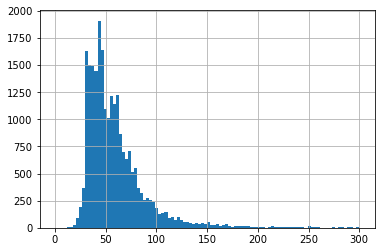

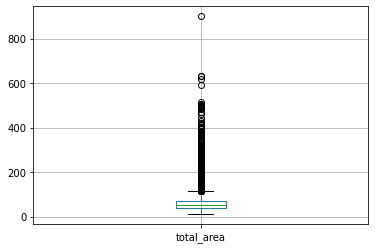

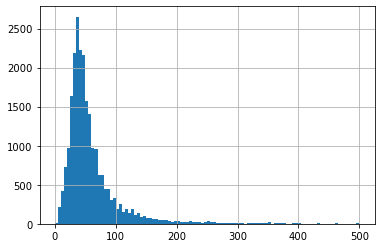

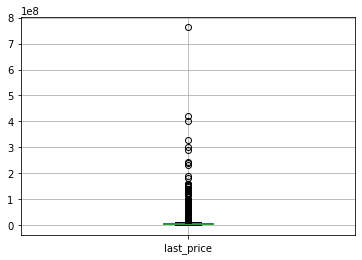

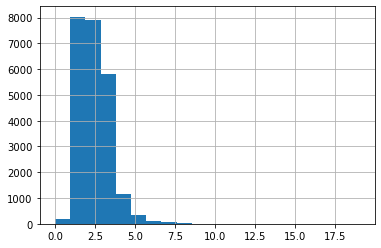

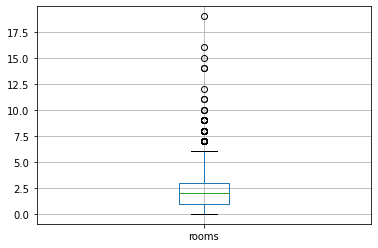

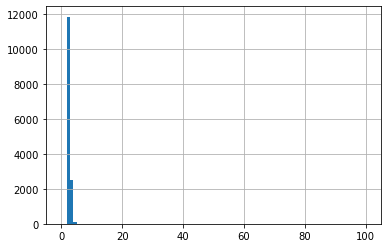

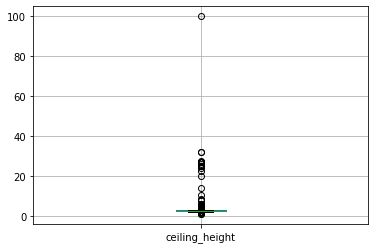

In [40]:
#data_pivot = data.pivot_table(index='open_plan', values='living_area', aggfunc=['count', 'sum', 'mean'])
#print(data_pivot)
#print(data_grouped['living_area'].hist(bins=30))

data['total_area'].hist(bins=100, range = (0, 300))
plt.show()
data.boxplot(column = 'total_area')
plt.show()

# так как цены очень большие для наглядности их можно поделить на 100 000
last_price_changed = data['last_price'] / 100000
last_price_changed.hist(bins=100, range=(0, 500))
plt.show()
data.boxplot(column = 'last_price')
plt.show()

data['rooms'].hist(bins=20)
plt.show()
data.boxplot(column = 'rooms')
plt.show()

ceiling_height_grouped = data[data['ceiling_height'] > 3]['ceiling_height']
data['ceiling_height'].hist(bins=100, range = (0, 100))
plt.show()
data.boxplot(column = 'ceiling_height')
plt.show()


Построим и гистограммы и боксплоты, сразу определим выбросы

Делаем выводы по графикам:

* общая площадь квартир от 30 до 100 кв.м. встречается чаще всего
* по ценам сложно определить каких значений больше, не изменив данные. Создав новую переменную, сохраняем в нее цены поделенные на 100 000 (речь идет и миллионах). Получилось, что в среднем квартиры стоят от 3-4 млн. до 7-8 млн.
* комнаты у нас чаще встречаются в количестве 1-4 плюс учитываем боксплот, итого максимум комнат берем 6.
* если посмотреть на гистограмму по потолкам, можно сказать, что в целом все впорядке. Но рассмотрим боксплот можно увидеть, что к нам попадают значения и 4 метра, и 8-10 метров, и где-то даже 100. Можно оставить зачения с 2 до 4 метров. Потолки высотой в 1 метр тоже не норма.


2. Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

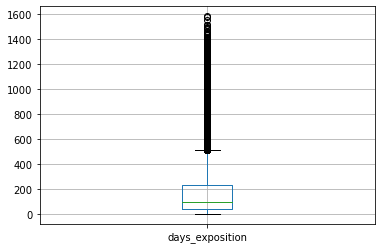

In [41]:
display(data['days_exposition'].describe())
data.boxplot(column = 'days_exposition')
plt.show()

Итого получаем:

В среднем продажи занимают от 45 до 230 дней. Самые быстрые продажи произошли примерно за промежуток 1-95 дней, а самые долгие доходят до периода в больше чем 4 года.

3. Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

In [42]:
data_grouped = data.query('total_area > 30 and total_area <= 100 and ceiling_height >= 2 and ceiling_height <= 4')

display(data_grouped)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category,living_to_total,total_to_kitchen,city_centers_nearest_km
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,48.0,121.0,100000,1,6,2018,другой,32.0,41.0,8.0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,1337.0,289.0,88525,6,2,2017,другой,71.0,11.0,15.0
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,True,...,553.0,137.0,127525,3,11,2017,другой,51.0,21.0,14.0
13,20,3550000,42.80,2017-07-01,2,2.56,5,27.00,5,True,...,298.0,366.0,82944,5,7,2017,последний,63.0,12.0,33.0
16,11,6700000,82.00,2017-11-23,3,3.05,5,55.60,1,True,...,1337.0,397.0,81707,3,11,2017,первый,68.0,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23640,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,True,...,652.0,29.0,100567,2,2,2018,другой,46.0,26.0,16.0
23642,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,True,...,806.0,519.0,129904,3,10,2016,другой,55.0,15.0,4.0
23644,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,True,...,675.0,239.0,73718,4,8,2016,другой,64.0,13.0,34.0
23648,13,11475000,76.75,2017-03-28,2,3.00,17,53.45,12,True,...,196.0,602.0,149511,1,3,2017,другой,70.0,30.0,10.0


Сделаем срез данных по условиям: общая площадь в пределах 30-100 кв.м. и потолки 2-4 м.
Таблица сильно уменьшилась, возможно потому что у наас в данных по потолкам более 9000 пропусков, а они в нашу фильтрацию не входят.

In [43]:
data.query('total_area > 30 and total_area <= 100 and (ceiling_height >= 2 and ceiling_height <= 4 or ceiling_height!=ceiling_height)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category,living_to_total,total_to_kitchen,city_centers_nearest_km
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,1050.0,81.0,82921,1,12,2018,первый,46.0,27.0,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,574.0,558.0,92786,3,8,2015,другой,61.0,15.0,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,48.0,121.0,100000,1,6,2018,другой,32.0,41.0,8.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,...,NaN,55.0,95066,0,9,2018,другой,47.0,30.0,NaN
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,True,...,978.0,155.0,99196,3,11,2017,другой,28.0,39.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23644,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,True,...,675.0,239.0,73718,4,8,2016,другой,64.0,13.0,34.0
23646,14,3100000,59.00,2018-01-15,3,NaN,5,38.00,4,True,...,NaN,45.0,52542,0,1,2018,другой,64.0,14.0,NaN
23647,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,True,...,NaN,NaN,44092,6,2,2018,первый,52.0,15.0,NaN
23648,13,11475000,76.75,2017-03-28,2,3.00,17,53.45,12,True,...,196.0,602.0,149511,1,3,2017,другой,70.0,30.0,10.0


4. Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также тзучим зависимость от даты размещения: дня недели, месяца и года.

In [44]:
# зависимость цены от площади 

pivot_area = data_grouped.pivot_table(index='total_area', values=('square_meter_price', 'last_price'), aggfunc=['count', 'median'])
display(pivot_area)


count                         median                   
           last_price square_meter_price  last_price square_meter_price
total_area                                                             
30.10              16                 16   2470000.0            82060.0
30.11               1                  1   2500000.0            83029.0
30.20              15                 15   2800000.0            92715.0
30.26               1                  1   2930000.0            96827.0
30.30              18                 18   2975000.0            98185.0
...               ...                ...         ...                ...
99.50               4                  4  11300000.0           113567.5
99.60               3                  3  12500000.0           125502.0
99.70               1                  1  11634919.0           116699.0
99.90               2                  2  11743000.0           117547.5
100.00             46                 46  11800000.0           118000.0

[1008 rows x 4 columns]

Определенно, цена за кв.м. зависит от общей площади квартиры, чем больше площадь, тем выше цена и общая стоимость.

In [45]:
# зависимость цены от количества комнат 

pivot_room = data_grouped.pivot_table(index='rooms', values=('square_meter_price', 'last_price'), aggfunc=['count', 'median'])
display(pivot_room)


count                        median                   
      last_price square_meter_price last_price square_meter_price
rooms                                                            
0             16                 16    3895000           112004.5
1           4192               4192    3750000           102046.0
2           4764               4764    4882500            95176.5
3           3309               3309    5900000            88077.0
4            414                414    6650000            83503.0
5             25                 25    6800000            73881.0
6              4                  4   10432000           110594.5

По сводной тблице видно, что стоимость зависит от количесва комнат: больше комнат - дороже квартира. А вот цена за кв.м. немного снижается от 1-комнатных квартир к 5-комнатным.

count                        median  \
                        last_price square_meter_price last_price   
city_centers_nearest_km                                            
0.0                              8                  8   12245000   
1.0                             79                 79    9200000   
2.0                            128                128    8810000   
3.0                            162                162    7425000   
4.0                            281                281    8000000   
5.0                            375                375    7850000   
6.0                            260                260    7300000   
7.0                            203                203    6500000   
8.0                            322                322    6731696   
9.0                            350                350    5500000   
10.0                           426                426    5200000   
11.0                           683                683    5150000   
12.0                           966                966    5100000   
13.0                           872                872    5200000   
14.0                           779                779    4950000   
15.0                           964                964    4980000   
16.0                           767                767    4850000   
17.0                           519                519    4690000   
18.0                           183                183    4300000   
19.0                           166                166    4300000   
20.0                            49                 49    4750000   
21.0                            95                 95    4900000   
22.0                           310                310    4190000   
23.0                            70                 70    4900000   
24.0                            50                 50    3850000   
25.0                            33                 33    4680000   
26.0                            57                 57    3750000   
27.0                            56                 56    4270000   
28.0                            63                 63    3500000   
29.0                            78                 78    4100000   
30.0                           121                121    3950000   
31.0                           159                159    4140000   
32.0                            78                 78    3625000   
33.0                            87                 87    4000000   
34.0                           111                111    4200000   
35.0                            60                 60    4625000   
36.0                            30                 30    4300000   
37.0                             8                  8    3500000   
39.0                             2                  2    3450000   
40.0                            12                 12    4145000   
41.0                             4                  4    3500000   
42.0                             3                  3    2900000   
43.0                             2                  2    5300000   
45.0                             1                  1    5100000   
47.0                            11                 11    3850000   
48.0                             6                  6    4000000   
49.0                            21                 21    3800000   
50.0                            39                 39    3600000   
51.0                            36                 36    3925000   
52.0                            34                 34    3250000   
53.0                            16                 16    4050000   
54.0                             3                  3    5000000   
55.0                             1                  1    8400000   
57.0                             1                  1    3015000   
61.0                             1                  1    3200000   
62.0                             1                  1    3200000   
63.0             

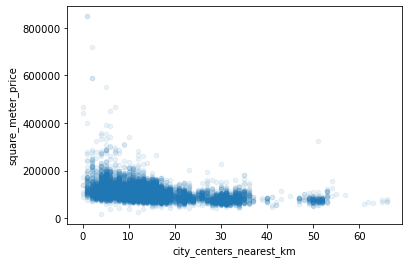

In [46]:
# зависимость цены от удаленности от центра

pivot_nearest = data_grouped.pivot_table(index='city_centers_nearest_km', values=('square_meter_price', 'last_price'), aggfunc=['count', 'median'])
display(pivot_nearest)

data_grouped.plot(x='city_centers_nearest_km', y='square_meter_price', kind='scatter', alpha=0.09)
plt.show()

По сводной и графику видно, что стоимость квартир немного зависит от удаленности от центра, чем ближе к центру тем дороже, цена за кв.м. начинает снижаться примерно с 16 км от центра, правда подальше есть выбивающиеся цены.

In [47]:
# зависимость цены от этажа

pivot_floor = data_grouped.pivot_table(index='floor_category', values=('square_meter_price', 'last_price'), aggfunc=['count', 'median'])
display(pivot_floor)


count                        median                   
               last_price square_meter_price last_price square_meter_price
floor_category                                                            
другой               9297               9297    4900000            98485.0
первый               1644               1644    4000000            82145.5
последний            1783               1783    4300000            87778.0

Да, все по правилам, последний и первый этажи дешевле, и в продаже таких меньше.

In [48]:
# зависимость цены от даты размещения

pivot_day_pub = data_grouped.pivot_table(index='weekday', values=('square_meter_price', 'last_price'), aggfunc='median')
pivot_month_pub = data_grouped.pivot_table(index='month', values=('square_meter_price', 'last_price'), aggfunc='median')
pivot_year_pub = data_grouped.pivot_table(index='year', values=('square_meter_price', 'last_price'), aggfunc='median')

display(pivot_day_pub)
display(pivot_month_pub)
display(pivot_year_pub)


,last_price,square_meter_price
weekday,,
0,4700000,95238.0
1,4850000,96641.0
2,4660000,95455.0
3,4655200,94668.5
4,4650000,94565.0
5,4600000,92667.0
6,4600000,94595.0


,last_price,square_meter_price
month,,
1,4700000,96173.0
2,4800000,95383.0
3,4650000,94610.0
4,4900000,97722.0
5,4623000,93626.0
6,4500000,93052.5
7,4675000,94540.0
8,4725000,95238.0
9,4650000,95599.5


,last_price,square_meter_price
year,,
2014,6020625.0,98052.0
2015,5063359.5,89143.5
2016,4600000.0,90837.0
2017,4500000.0,92105.0
2018,4600000.0,95556.0
2019,5150000.0,103704.0


По сводным можно заметить зависимость стоимости от года. С 2014 по 2018 года стоимость держиться почти на одном уровне, в 2019 году заметен рост. Что касается дней недели и месяцев, тут все почти на одном уровне, все-таки стоимость не зависит в какой день и в какой месяц продается квартира.

Итак, получается что цены за кв.м. меньше если площадь квартиры и количество комнат больше, а общая стоимость растет. Может все завсит от местонахождения. С этажами все очень ясно: если не первый и не последний, квартира будет дороже. Даты публикации не влияют на цены, а от года зависит за сколько вы продадите квартиру.

In [49]:
data_grouped[['last_price', 'square_meter_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,square_meter_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.776590,0.648407,0.338955,-0.345078
square_meter_price,0.776590,1.000000,0.084487,-0.140853,-0.371849
total_area,0.648407,0.084487,1.000000,0.775235,-0.165726
rooms,0.338955,-0.140853,0.775235,1.000000,-0.084839
city_centers_nearest,-0.345078,-0.371849,-0.165726,-0.084839,1.000000


Зависимость цены за кв.м. от общей площади положительная, от количества комнат - слабая, от расстояния до центра отрицательная слабая.

Больше всего на стоимость квартиры влиет общая площадь.

5. Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [50]:
ten_localities_first = data_grouped.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['mean', 'count'])
ten_localities_second = data_grouped.pivot_table(index='locality_name', values='last_price', aggfunc=['max', 'min'])

ten_localities_total = ten_localities_first.join(ten_localities_second)

display(ten_localities_total.sort_values(by=('count', 'square_meter_price'), ascending=False).head(10))


,mean,count,max,min
,square_meter_price,square_meter_price,last_price,last_price
locality_name,,,,
санкт-петербург,110472.856547,8637,53000000,1200000
всеволожск,67074.938931,262,10300000,1290000
мурино,87153.200957,209,7500000,2310000
шушары,78669.450000,200,8179000,2000000
пушкин,100389.695000,200,14500000,2400000
колпино,75298.052910,189,8000000,2100000
кудрово,95559.208791,182,12800000,2750000
гатчина,70161.370629,143,13900000,1050000


Больше всего объявлений в Санкт-Петербурге, максимальные и средние показатели соответсвенно тоже там, и минимальная цена тоже попала в Питер (возможно занижена относительно рыночной).

6. Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

,square_meter_price
city_centers_nearest_km,
0.0,207292.875000
1.0,159614.721519
2.0,149661.023438
3.0,117929.283951
4.0,131245.718861
5.0,135269.802667
6.0,130733.115385
7.0,127046.945813
8.0,123039.291925


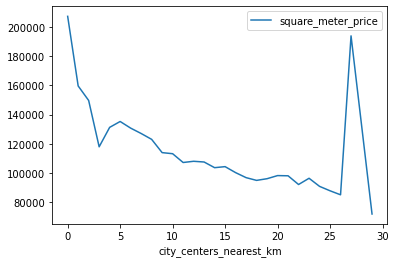

In [51]:
spb = data_grouped[data_grouped['locality_name'] == 'санкт-петербург']

spb_pivot = spb.pivot_table(index='city_centers_nearest_km', values='square_meter_price')
display(spb_pivot)

spb_pivot.plot()
plt.show()


Сюдя по графику цена до 5 км сильно падает, затем немного растет и снова снижается до 25 км. Если брать условие "Определите границу, где график сильно меняется, — это и будет центральная зона", тогда центром можно считать расстояние от 5 км до 25 км. Но я все же хочу определить границу до 20 км.

7. Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

In [52]:
spb_center = spb[spb['city_centers_nearest_km'] <= 20][['square_meter_price', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floor', 'city_centers_nearest_km', 'first_day_exposition', 'year']]
display(spb_center)


,square_meter_price,last_price,total_area,rooms,ceiling_height,floor,city_centers_nearest_km,first_day_exposition,year
4,100000,10000000,100.00,2,3.03,13,8.0,2018-06-19,2018
9,88525,5400000,61.00,3,2.50,7,15.0,2017-02-26,2017
10,127525,5050000,39.60,1,2.67,3,14.0,2017-11-16,2017
16,81707,6700000,82.00,3,3.05,1,11.0,2017-11-23,2017
18,104839,3250000,31.00,1,2.50,2,11.0,2017-01-27,2017
...,...,...,...,...,...,...,...,...,...
23632,122093,5250000,43.00,2,2.50,2,7.0,2018-05-11,2018
23637,106452,3300000,31.00,1,2.55,6,12.0,2017-04-29,2017
23640,100567,3550000,35.30,1,2.86,4,16.0,2018-02-28,2018
23642,129904,9470000,72.90,2,2.75,7,4.0,2016-10-13,2016


In [53]:
# посмотрим зависимость цены от удаленности в центре Питера

spb_center[['last_price','city_centers_nearest_km']].corr() 

,last_price,city_centers_nearest_km
last_price,1.000000,-0.396854
city_centers_nearest_km,-0.396854,1.000000


In [54]:
# посмотрим зависимость цены от удаленности во всем Питере

spb[['last_price','city_centers_nearest_km']].corr() 

,last_price,city_centers_nearest_km
last_price,1.000000,-0.383307
city_centers_nearest_km,-0.383307,1.000000


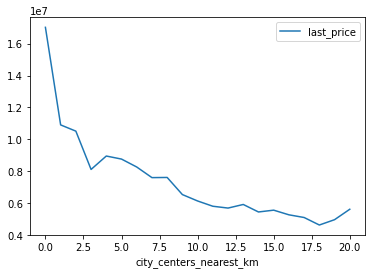

In [55]:
# можно ли утверждать, что стоимость квартир в 12-15 км от центра дороже?

(spb_center.pivot_table(index='city_centers_nearest_km',values='last_price',aggfunc='mean')
           .plot()
);

In [56]:
# зависимость стоимости от площади в центре Питера

spb_center[['last_price','total_area']].corr()

,last_price,total_area
last_price,1.000000,0.695938
total_area,0.695938,1.000000


In [57]:
# зависимость стоимости от площади во всем Питере

spb[['last_price','total_area']].corr()

,last_price,total_area
last_price,1.00000,0.69315
total_area,0.69315,1.00000


In [58]:
# зависимость стоимости от цены за кв.м. в центре Питера

spb_center[['last_price','square_meter_price']].corr()

,last_price,square_meter_price
last_price,1.000000,0.729186
square_meter_price,0.729186,1.000000


In [59]:
# зависимость стоимости от цены за кв.м. во всем Питере

spb[['last_price','square_meter_price']].corr()

,last_price,square_meter_price
last_price,1.000000,0.727085
square_meter_price,0.727085,1.000000


In [60]:
# зависимость стоимости от количества комнат в центре Питера

spb_center[['last_price','rooms']].corr()

,last_price,rooms
last_price,1.000000,0.358123
rooms,0.358123,1.000000


In [61]:
# зависимость стоимости от количества комнат во всем Питере

spb[['last_price','rooms']].corr()

,last_price,rooms
last_price,1.00000,0.36052
rooms,0.36052,1.00000


In [62]:
# зависимость стоимости от высоты потолков в центре Питера

spb_center[['last_price','ceiling_height']].corr()

,last_price,ceiling_height
last_price,1.000000,0.465116
ceiling_height,0.465116,1.000000


In [63]:
# зависимость стоимости от высоты потолков во всем Питере

spb[['last_price','ceiling_height']].corr()

,last_price,ceiling_height
last_price,1.000000,0.461509
ceiling_height,0.461509,1.000000


**Вывод**

* Стоимость квартир в 12-15 км от центра значительно дешевле квартир, которые находятся ближе к центру.
* Общая площадь. Зависимость стоимости от общей площади положитльная и зависимости по центру Питера и всему городу не отличаются. Можно сделать вывод, что общая площадь вляет на стоимость квартир, но не важно в центре города или нет.
* Цена за квадратный метр. В центре Питера зависимость сильная и положительная, по всему Питеру немного слабее, но не значительно. Следовательно цена влияет на стоимость в центре немного больше чем по всему городу.
* Количество комнат. Зависимость слабая, положительная. То есть и в центре и во всем городе стоимость не сильно зависит от количества комнат в квартире.
* Высота потолков. Также в центре и во всем городе зависимость не отличается, но влияние высоты потолков на стоимость немного выше влияния комнат. Можно сказать, что стоимость квартир больше зависит от высоты потолков чем от количества комнат.

,count,median
,last_price,last_price
floor,,
1,926,4990000.0
2,1098,5400000.0
3,1027,5600000.0
4,1008,5600000.0
5,898,5150000.0
6,507,5450000.0
7,513,5200000.0
8,449,5150000.0


<AxesSubplot:xlabel='floor'>

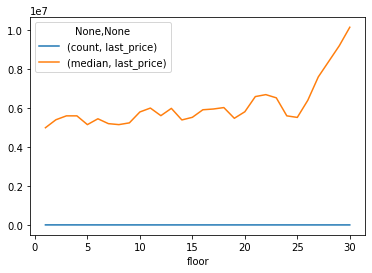

In [64]:
# зависимость стоимости от этажа в центре Питера 

pivot_floor_center = spb_center.pivot_table(index='floor', values='last_price', aggfunc=['count', 'median'])
display(pivot_floor_center)
pivot_floor_center.plot()

,count,median
,last_price,last_price
floor,,
1,951,4990000
2,1137,5400000
3,1061,5600000
4,1020,5600000
5,918,5100000
6,517,5490000
7,523,5200000
8,467,5150000


<AxesSubplot:xlabel='floor'>

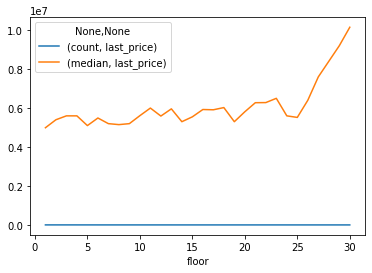

In [65]:
# зависимость стоимости от этажа во всем Питере 

pivot_floor_spb = spb.pivot_table(index='floor', values='last_price', aggfunc=['count', 'median'])
display(pivot_floor_spb)
pivot_floor_spb.plot()


,last_price
year,
2014,7500000
2015,5800000
2016,5443500
2017,5200000
2018,5300000
2019,5700000


<AxesSubplot:xlabel='year'>

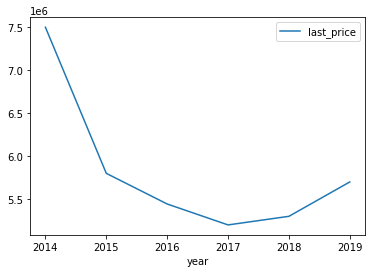

In [66]:
# зависимость стоимости от даты размещения в центре Питера 

pivot_date_center = spb_center.pivot_table(index='year', values='last_price', aggfunc='median')
display(pivot_date_center)
pivot_date_center.plot()

,last_price
year,
2014,7580000
2015,5827690
2016,5400000
2017,5200000
2018,5300000
2019,5700000


<AxesSubplot:xlabel='year'>

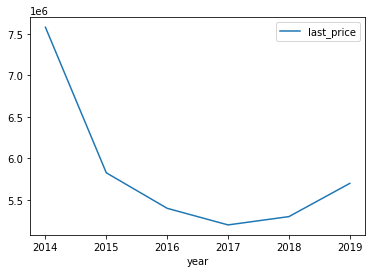

In [67]:
# зависимость стоимости от даты размещения во всем Питере 

pivot_date_spb = spb.pivot_table(index='year', values='last_price', aggfunc='median')
display(pivot_date_spb)
pivot_date_spb.plot()

**Вывод**

* Этаж. По графикам и сводным можно сделать вывод, что этаж не значительно влияет на стоимость квартир как в центре, так и по всему Питеру. Первые и последние этажи стоят немного дешевле и их мало в продаже.
* Дата размещения объявления. Так как выше мы уже сделали вывод, что на стоимость не влиет ни день недели ни месяц, возмем для сводной данные по годам, и также построим график. Здесь мы видим, что до 2017 года и по центру и по всему Питеру есть небольшая разница в стоимости квартиры, после никаких отличий нет. Значит дата публикации, можно сказать, никак не влияет на стоимость квартиры.


## Общий вывод

В процессе обработки данных по пропускам и выбивающимся значениям было отобрано около 55% всей таблицы.

Изучив таблицу по графикам и общим описаниям выбранных нами параметров получаем:

1. Стоимость квратиры зависит от даты продажи, точнее именно от года. Здесь скорей всего все зависит в среднем от рыночных показателей. Дни и месяцы никак не влияют на цены.
2. Район и местоположение также влияет на цены. Так в отдаленных поселках и цена намного ниже чем в самом городе. А в самом городе чем ближе к центру тем дороже. Выпадающие заниженные цены могут быть показателем мошенничества, так как мошенники чаще всего стараются снизить цены на 15-30 %.  
3. Количество комнат не сильно влияет на стоимсоть, а вот от площадь квартиры - да. Это может быть свободная планировка либо две большие комнаты, но 100 кв.м будут стоить дороже 40 кв.м. Хотя заметен еще такой показатель, если квадратура большая, то цена за кв.м. будет меньше. 
4. Цена за квадратный метр также влияет на стоимость квартир.

Также рассмотрели зависимость стоимости по центру Питера и всему городу. Вывод остается прежним: все рассмотреные параметры также влияют на стоимость квартир в центре как и по всему городу.